<a href="https://colab.research.google.com/github/sergioarnold87/Practica_Sergio/blob/main/Caso_practico_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# SOM
Importar dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Identificar los fraudes potenciales con un SOM

# Escalado de caracteristicas

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Entrenar el SOM

In [6]:
import sys
sys.path.append('/content/drive/MyDrive/Datasets/')
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

#Visualizar los resultados

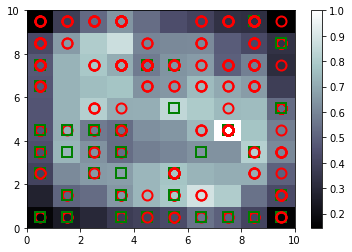

In [7]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5,
         markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', 
         markersize = 10, markeredgewidth = 2)
show()

# Encontrar los fraudes

In [8]:
mappings = som.win_map(X)
frauds = np.concatenate( (mappings[(3,1)], mappings[(2,5)]), axis = 0 )
frauds = sc.inverse_transform(frauds)

# Parte 2 - Trasladar el modelo de Deep Learning de no 

*   Elemento de la lista
*   Elemento de la lista

supervisado a supervisado


# Crear la matriz de características

In [9]:
customers = dataset.iloc[:, 1:-1].values

# Crear la variable dependiente

In [10]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i, 0] in frauds:
    is_fraud[i] = 1

# Escalar Variables

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
customers = sc_X.fit_transform(customers)

# Parte 2 - Construir la RNA


In [12]:
from keras.models import Sequential
from keras.layers import Dense

# Inicializar la RNA

In [13]:
classifier = Sequential()

# Añadir las capas de entrada y primera capa oculta

In [14]:
classifier.add(Dense(units = 2, kernel_initializer = "uniform", activation = "relu", input_dim = 14))

# Añadir la capa de salida

In [15]:
classifier.add(Dense(units = 1, kernel_initializer = "uniform", activation = "sigmoid"))

# Compilar la RNA

In [16]:
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# Ajustar la RNA al conjunto de Entrenamiento

In [17]:
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 14s 1ms/step - loss: 0.5983 - accuracy: 0.9150
Epoch 2/2
690/690 [==============================] - 1s 1ms/step - loss: 0.2357 - accuracy: 0.9340


# Predicción de los resultados de fraude

In [19]:
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:,1].argsort()]


In [21]:
print(y_pred)

[[1.56179910e+07 7.14480877e-03]
 [1.56650140e+07 7.63422251e-03]
 [1.56628540e+07 7.77748227e-03]
 ...
 [1.58018170e+07 3.57286811e-01]
 [1.57250020e+07 3.57286811e-01]
 [1.55715710e+07 3.57286811e-01]]
